In [73]:
import pandas as pd
import numpy as np

import re

In [75]:
dados = pd.read_csv('../dados/carros_bruto.csv', dtype={'precos':str})
dados.head()

,precos,Categoria,Modelo,Marca,Tipo de veículo,Ano,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,Cor,Portas,Final de placa,Possui Kit GNV,Tipo de direção
0,45.900,"Carros, Vans E Utilitários",Hyundai C./c.plus/c.style 1.6 Flex 16v Mec.,Hyundai,Hatch,2016.0,50800.0,1.6,Flex,Manual,Hidráulica,Branco,4 Portas,4.0,Sim,Hidráulica
1,93.900,"Carros, Vans E Utilitários",Nissan Sense 1.6 16v Flex Aut,Nissan,Suv,2022.0,53000.0,1.6,Flex,Automático,Elétrica,Cinza,4 Portas,NaN,NaN,NaN
2,118.900,"Carros, Vans E Utilitários",Fiat Volcano 1.3 Flex 8v Cd,Fiat,Pick-up,2023.0,13773.0,1.3,Flex,Manual,Elétrica,Prata,4 Portas,NaN,Não,Elétrica
3,67.990,"Carros, Vans E Utilitários",Chevrolet Plus Lt 1.0 12v Flex Mec. 4p,Chevrolet,Sedã,2020.0,56020.0,1.0,Flex,Manual,Elétrica,Branco,4 Portas,4.0,Não,Elétrica
4,46.500,"Carros, Vans E Utilitários",Honda Sedan Exs 1.8/1.8 Flex 16v Aut. 4p,Honda,Sedã,2007.0,166000.0,1.8,Flex,Automático,Hidráulica,Cinza,4 Portas,2.0,Não,Hidráulica


In [76]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   precos             499 non-null    object 
 1   Categoria          499 non-null    object 
 2   Modelo             499 non-null    object 
 3   Marca              499 non-null    object 
 4   Tipo de veículo    482 non-null    object 
 5   Ano                499 non-null    float64
 6   Quilometragem      499 non-null    float64
 7   Potência do motor  487 non-null    object 
 8   Combustível        493 non-null    object 
 9   Câmbio             487 non-null    object 
 10  Direção            480 non-null    object 
 11  Cor                490 non-null    object 
 12  Portas             493 non-null    object 
 13  Final de placa     428 non-null    float64
 14  Possui Kit GNV     477 non-null    object 
 15  Tipo de direção    458 non-null    object 
dtypes: float64(3), object(13)


In [77]:
dados.isna().sum()

precos                1
Categoria             1
Modelo                1
Marca                 1
Tipo de veículo      18
Ano                   1
Quilometragem         1
Potência do motor    13
Combustível           7
Câmbio               13
Direção              20
Cor                  10
Portas                7
Final de placa       72
Possui Kit GNV       23
Tipo de direção      42
dtype: int64

In [78]:
dados[dados.precos.isna()]

,precos,Categoria,Modelo,Marca,Tipo de veículo,Ano,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,Cor,Portas,Final de placa,Possui Kit GNV,Tipo de direção
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
dados['precos'] = pd.to_numeric(dados.precos.str.replace('.',''))

In [ ]:
dados['Potência do motor'] = pd.to_naumeric(dados['Potência do motor'].apply(
    lambda x: re.search(r'\d+(\.\d+)?', str(x)).group() if re.search(r'\d+(\.\d+)?', str(x)) else None
))

In [98]:
modas = {
    col: dados[col].mode()[0]
    for col in dados.select_dtypes(include='object').columns
    if not dados[col].mode().empty
}

medianas = {
    col: dados[col].median()
    for col in dados.select_dtypes(include='number').columns
}

preenchimentos = {**modas, **medianas}

dados.fillna(preenchimentos, inplace=True)


In [99]:
dados.isna().sum()

precos               0
Categoria            0
Modelo               0
Marca                0
Tipo de veículo      0
Ano                  0
Quilometragem        0
Potência do motor    0
Combustível          0
Câmbio               0
Direção              0
Cor                  0
Portas               0
Final de placa       0
Possui Kit GNV       0
Tipo de direção      0
dtype: int64

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
dados.Categoria.value_counts()

Categoria
Carros, Vans E Utilitários    500
Name: count, dtype: int64

In [108]:
dados.Portas.value_counts()

Portas
4 Portas    476
2 Portas     23
3 Portas      1
Name: count, dtype: int64

In [113]:
for col in dados.columns:
    if dados[col].unique().shape[0] <= 3:
        print(col)

Categoria
Câmbio
Portas
Possui Kit GNV


In [115]:
dados.groupby('Câmbio')['precos'].mean()

Câmbio
Automático    111676.283525
Manual         64763.502092
Name: precos, dtype: float64

In [116]:
dados.groupby('Portas')['precos'].mean()

Portas
2 Portas    68985.565217
3 Portas    99900.000000
4 Portas    90208.863445
Name: precos, dtype: float64

In [149]:
dados['Possui Kit GNV'].value_counts()

Possui Kit GNV
Não    494
Sim      6
Name: count, dtype: int64

In [146]:
dados['Potência do motor'].value_counts()

Potência do motor
1.0    281
1.6     41
1.3     40
2.0     40
1.4     31
1.2     21
1.8     20
1.5     13
3.0     10
4.0      3
Name: count, dtype: int64

In [141]:
dados['Direção'].value_counts()

Direção
Elétrica             355
Hidráulica           122
Mecânica              19
Eletro-hidráulica      4
Name: count, dtype: int64

In [133]:
dados.groupby('Cor')['precos'].mean().sort_values()

Cor
Verde        27500.000000
Branco       83381.020619
Prata        83929.897959
Vermelho     84400.344828
Cinza        94671.879310
Preto        98829.014085
Outra       102760.000000
Azul        109429.677419
Name: precos, dtype: float64

In [137]:
dados.groupby('Combustível')['precos'].median().sort_values()

Combustível
álcool        9998.0
Gasolina     79945.0
Flex         81490.0
Híbrido     151890.0
Diesel      152740.0
Name: precos, dtype: float64

In [147]:
dados['Combustível'].value_counts()

Combustível
Flex        450
Diesel       36
Gasolina     12
Híbrido       1
álcool        1
Name: count, dtype: int64

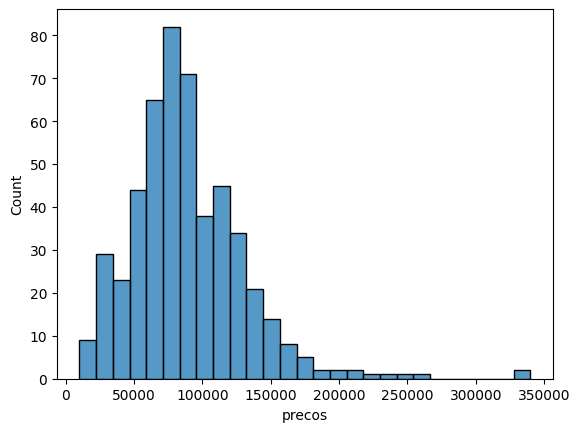

In [139]:
sns.histplot(dados, x='precos')
plt.show()

In [156]:
def remover_categorias_raras(df, col, limite=10):
    freq = df[col].value_counts()
    categorias_comuns = freq[freq >= limite].index
    return df[df[col].isin(categorias_comuns)]

colunas = ['Marca', 'Tipo de veículo', 'Potência do motor', 
           'Combustível', 'Câmbio', 'Direção', 'Portas', 'Tipo de direção']

df_filtrado = dados.copy()
for coluna in colunas:
    df_filtrado = remover_categorias_raras(df_filtrado, coluna, limite=10)


In [158]:
df_filtrado.Marca.value_counts()

Marca
Chevrolet     116
Fiat           98
Volkswagen     82
Hyundai        44
Jeep           36
Ford           19
Toyota         17
Renault        16
Nissan         12
Honda          12
Mitsubishi      9
Name: count, dtype: int64

In [159]:
df_filtrado.shape

(461, 11)

In [150]:
dados.drop(['Categoria', 'Modelo', 'Possui Kit GNV', 'Final de placa', 'Cor'], axis=1, inplace=True)

In [153]:
dados.columns

Index(['precos', 'Marca', 'Tipo de veículo', 'Ano', 'Quilometragem',
       'Potência do motor', 'Combustível', 'Câmbio', 'Direção', 'Portas',
       'Tipo de direção'],
      dtype='object')